<a href="https://colab.research.google.com/github/Patrick-Setubal/data_science_analytics/blob/main/puc/sprint1/sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP – Análise de Dados e Boas Práticas
# Aluno: Patrick Setubal Pereira Salgado



# 1) Definição do problema 







**Sobre o dataset:**

Nesta análise será utilizado o dataset “Emissions by country” que fornece uma visão aprofundada das emissões globais de CO2 para cada país, podendo avaliar quais os países que estão causando mais impacto ao meio ambiente. Nele contém informações sobre a emissão por meio de diversos combustíveis como carvão, petróleo, gás, produção em queima, cimento e outros. Este estudo tem como objetivo entender o senário global, como começou sua evolução e onde está, após estender realizar um aprendizado supervisionado visando prever a emissão para só próximos anos.

**Colunas:**
1. **Country:** O nome do país. (String)
2. **ISO 3166-1 alpha-3:**  O código de três letras do país. (String)
3. **Year:** O ano dos dados. (Integer)
4. **Total:** A quantidade total de emissões de CO2 para o país no ano determinado. (Float) (Mt)
5. **Coal:** A quantidade de emissões de CO2 do carvão para o país em determinado ano. (Float) (Mt)
6. **Oil:** A quantidade de emissões de CO2 do petróleo para o país em determinado ano. (Float) (Mt)
7. **Gas:** A quantidade de emissões de CO2 do gás para o país no ano determinado. (Float) (Mt)
8. **Cement:** A quantidade de emissões de CO2 da produção de cimento para o país em determinado ano. (Float) (Mt)
9. **Flaring:** A quantidade de emissões de CO2 das operações de queima para o país em um determinado ano. (Float) (Mt)
10. **Other:** A quantidade de emissões de CO2 de outras fontes para o país em determinado ano. (Float) (Mt)
11. **Per Capita:** A quantidade de emissões de CO2 per capita para o país em determinado ano. (Float) (t)

**Unidade:** **Mt** (Milhões de toneladas), **t** (toneladas)


**Licença:** *CC0 1.0 Universal (CC0 1.0) - Public Domain Dedication*

**Link:** *https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022*

# 2) Importação

Primeiro será importado as bibliotecas que vão ser utilizadas 
*   **Pandas:** Leitura e tratamento dos dados
*   **Seaborn** e **Matplotlib:** Plotar gráficos 
*   **Numpy:** realizar cálculos entre dados no formato array

Em seguida sera carregado e exibido o head do Dataset usando o pandas. 

In [1]:
# ----------- Imports -----------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


adress_data = 'https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/CO2_emissions.csv'
df_co2 = pd.read_csv(adress_data)
df_co2.head()

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN  
3      NaN    NaN         NaN  
4      NaN    NaN         NaN

Para facilitar o trabalho o nome das colunas serão traduidas 

In [2]:
# Traduzindo e renomeando colunas 
df = df_co2.rename(columns={
    'Country': 'pais', 
    'ISO 3166-1 alpha-3': 'sigla_pais', 
    'Year': 'ano', 
    'Total':'total', 
    'Coal': 'carvao', 
    'Oil': 'petroleo', 
    'Gas':'gas', 
    'Cement':'cimento',
    'Flaring': 'queima',
    'Other': 'outros',
    'Per Capita': 'por_pessoa'})
df.head()

pais sigla_pais   ano  total  carvao  petroleo  gas  cimento  \
0  Afghanistan        AFG  1750    0.0     NaN       NaN  NaN      NaN   
1  Afghanistan        AFG  1751    0.0     NaN       NaN  NaN      NaN   
2  Afghanistan        AFG  1752    0.0     NaN       NaN  NaN      NaN   
3  Afghanistan        AFG  1753    0.0     NaN       NaN  NaN      NaN   
4  Afghanistan        AFG  1754    0.0     NaN       NaN  NaN      NaN   

   queima  outros  por_pessoa  
0     NaN     NaN         NaN  
1     NaN     NaN         NaN  
2     NaN     NaN         NaN  
3     NaN     NaN         NaN  
4     NaN     NaN         NaN

# 3) Análise de dados


## 3.1) Estatísticas descritivas

Será exibido as primeiras e as últimas linhas visando compreender o formato dos dados

In [3]:
# Exibir Inicio e final do dataset para entender os dados
display(df.head())
print("\n")
display(df.tail())

pais sigla_pais   ano  total  carvao  petroleo  gas  cimento  \
0  Afghanistan        AFG  1750    0.0     NaN       NaN  NaN      NaN   
1  Afghanistan        AFG  1751    0.0     NaN       NaN  NaN      NaN   
2  Afghanistan        AFG  1752    0.0     NaN       NaN  NaN      NaN   
3  Afghanistan        AFG  1753    0.0     NaN       NaN  NaN      NaN   
4  Afghanistan        AFG  1754    0.0     NaN       NaN  NaN      NaN   

   queima  outros  por_pessoa  
0     NaN     NaN         NaN  
1     NaN     NaN         NaN  
2     NaN     NaN         NaN  
3     NaN     NaN         NaN  
4     NaN     NaN         NaN

pais sigla_pais   ano         total        carvao      petroleo  \
63099  Global        WLD  2017  36096.739276  14506.973805  12242.627935   
63100  Global        WLD  2018  36826.506600  14746.830688  12266.016285   
63101  Global        WLD  2019  37082.558969  14725.978025  12345.653374   
63102  Global        WLD  2020  35264.085734  14174.564010  11191.808551   
63103  Global        WLD  2021  37123.850352  14979.598083  11837.159116   

               gas      cimento      queima      outros  por_pessoa  
63099  7144.928128  1507.923185  391.992176  302.294047    4.749682  
63100  7529.846784  1569.218392  412.115746  302.478706    4.792753  
63101  7647.528220  1617.506786  439.253991  306.638573    4.775633  
63102  7556.290283  1637.537532  407.583673  296.301685    4.497423  
63103  7921.829472  1672.592372  416.525563  296.145746    4.693699

Será exibido as informações do dataset visando verificar se o Dtype está correto, a quantidade de dados nulos e a distribuição dos dados. 

In [4]:
# Verificar se o formato das colunas estão corretos 
display(df.describe())
print("\n")
display(df.info())

ano         total        carvao      petroleo           gas  \
count  63104.000000  62904.000000  21744.000000  21717.000000  21618.000000   
mean    1885.500000     55.224788     73.968916     55.760624     23.504285   
std       78.519728    824.845435    598.986992    519.034563    247.674772   
min     1750.000000      0.000000      0.000000      0.000000      0.000000   
25%     1817.750000      0.000000      0.000000      0.091600      0.000000   
50%     1885.500000      0.000000      0.271852      1.044240      0.000000   
75%     1953.250000      0.549342      6.736411      8.339752      0.581628   
max     2021.000000  37123.850352  15051.512770  12345.653374   7921.829472   

            cimento        queima       outros    por_pessoa  
count  20814.000000  21550.000000  1620.000000  18974.000000  
mean       4.330443      1.712695    10.951389      4.413363  
std       50.305770     16.727067    39.034073     17.432815  
min        0.000000      0.000000     0.000000      0.000000  
25%        0.000000      0.000000     0.520885      0.197866  
50%        0.022756      0.000000     1.255329      1.303949  
75%        0.568502      0.000000     4.385471      5.077994  
max     1672.592372    439.253991   306.638573    834.192642



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pais        63104 non-null  object 
 1   sigla_pais  61472 non-null  object 
 2   ano         63104 non-null  int64  
 3   total       62904 non-null  float64
 4   carvao      21744 non-null  float64
 5   petroleo    21717 non-null  float64
 6   gas         21618 non-null  float64
 7   cimento     20814 non-null  float64
 8   queima      21550 non-null  float64
 9   outros      1620 non-null   float64
 10  por_pessoa  18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


None

Este dataset possui 63104 Linhas, seu Dtypes está correto, a coluna 'ano' começa em 1750 a 2021, a média e os quartis dos dados estão muito distantes do valor máximo, porém é possível observar que muitas colunas estão com missings (Valores nulos).

## 3.2) Visualização

Inicialmente na etapa de visualizações será exibido um gráfico de densidade e outro de histograma para entender a proporcionalidade dos dados

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

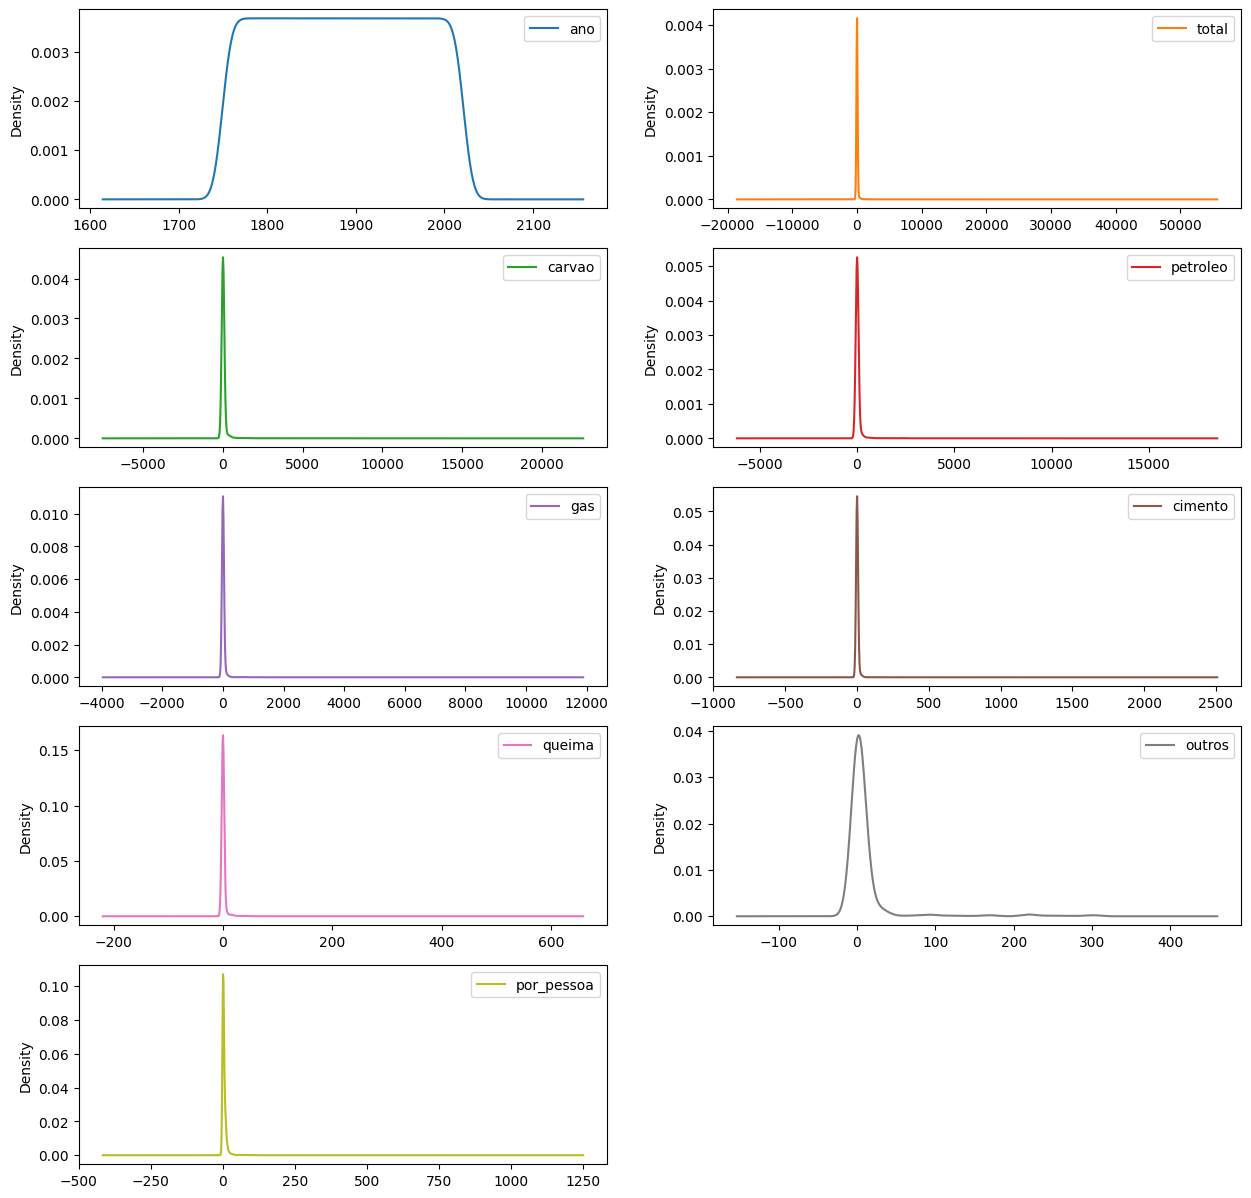

In [5]:
df.plot(kind='density', subplots=True, sharex=False, layout=(5,2), figsize=(15,15))

array([[<Axes: title={'center': 'ano'}>,
        <Axes: title={'center': 'total'}>,
        <Axes: title={'center': 'carvao'}>],
       [<Axes: title={'center': 'petroleo'}>,
        <Axes: title={'center': 'gas'}>,
        <Axes: title={'center': 'cimento'}>],
       [<Axes: title={'center': 'queima'}>,
        <Axes: title={'center': 'outros'}>,
        <Axes: title={'center': 'por_pessoa'}>]], dtype=object)

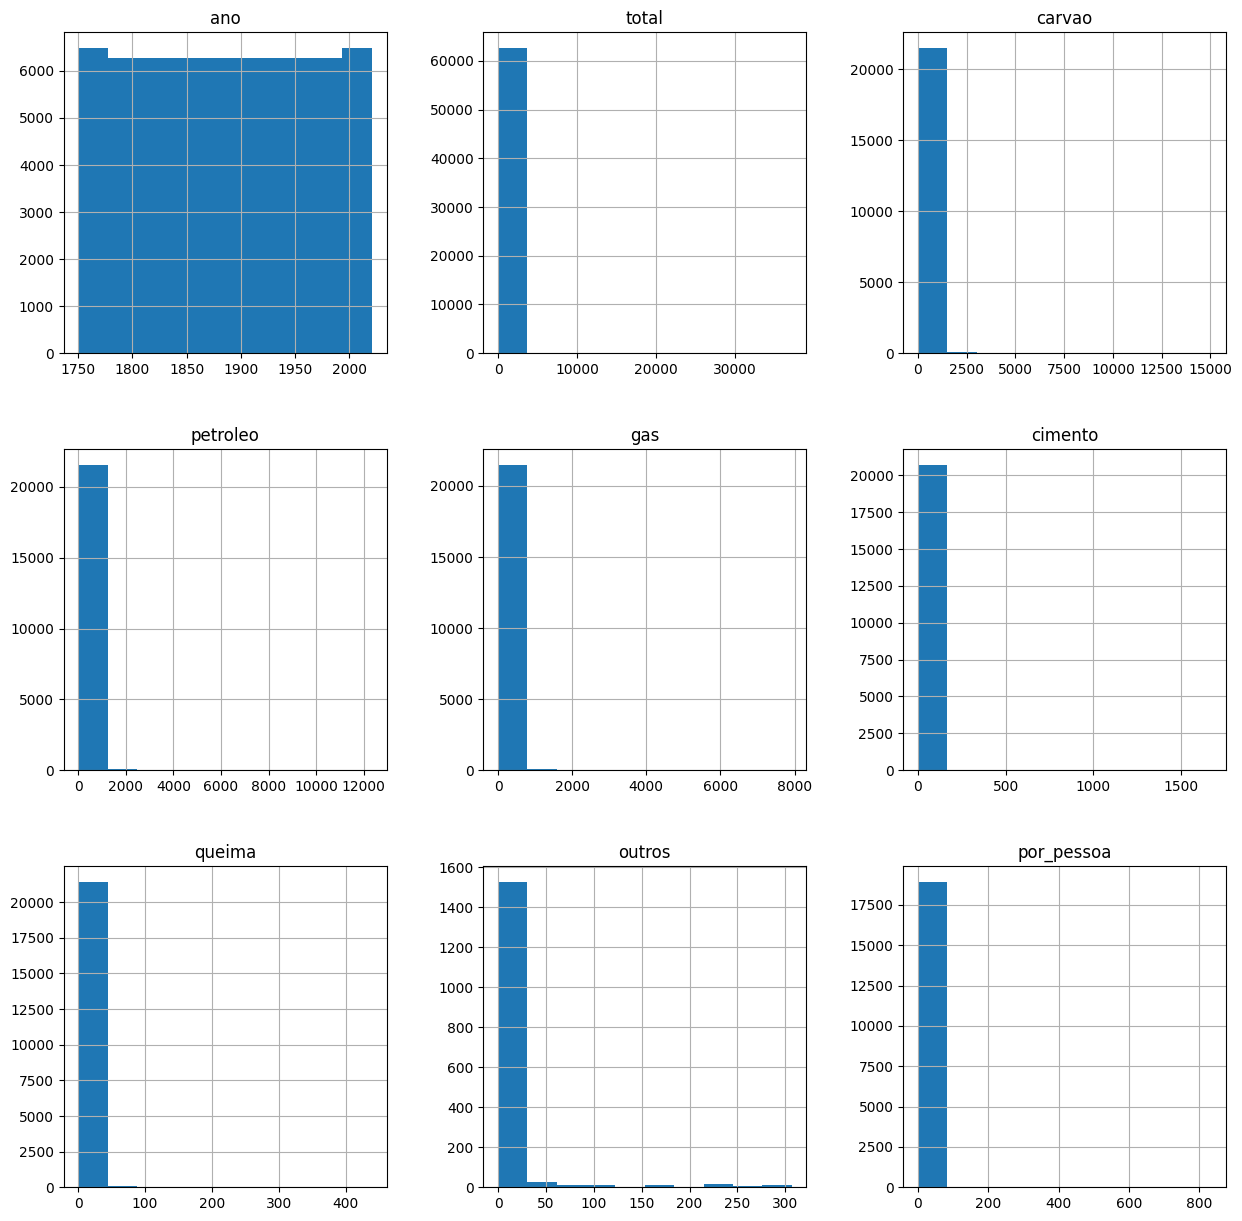

In [6]:
df.hist(figsize=(15,15))

É possível observar que a maior concentração dos dados está no valor 0 e que a coluna "ano" está bem distribuída

Na próxima etapa será exibido um o grafico para verifique a distribuição de cada atributo e suas correlações

<Axes: >

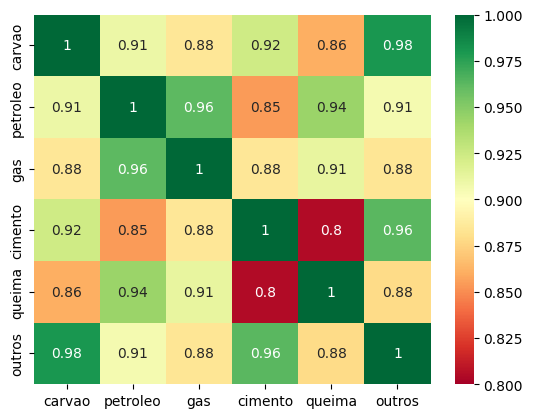

In [7]:
lista = ['carvao','petroleo','gas','cimento','queima','outros'] 
sns.heatmap(df[lista].corr(), annot=True, cmap="RdYlGn", vmin=0.8, vmax=1)

É possível observar que todos os valores possui uma forte correlação oque sugera que com o passar dos anos (linhas no df) todas as emissões tendem a aumentar.

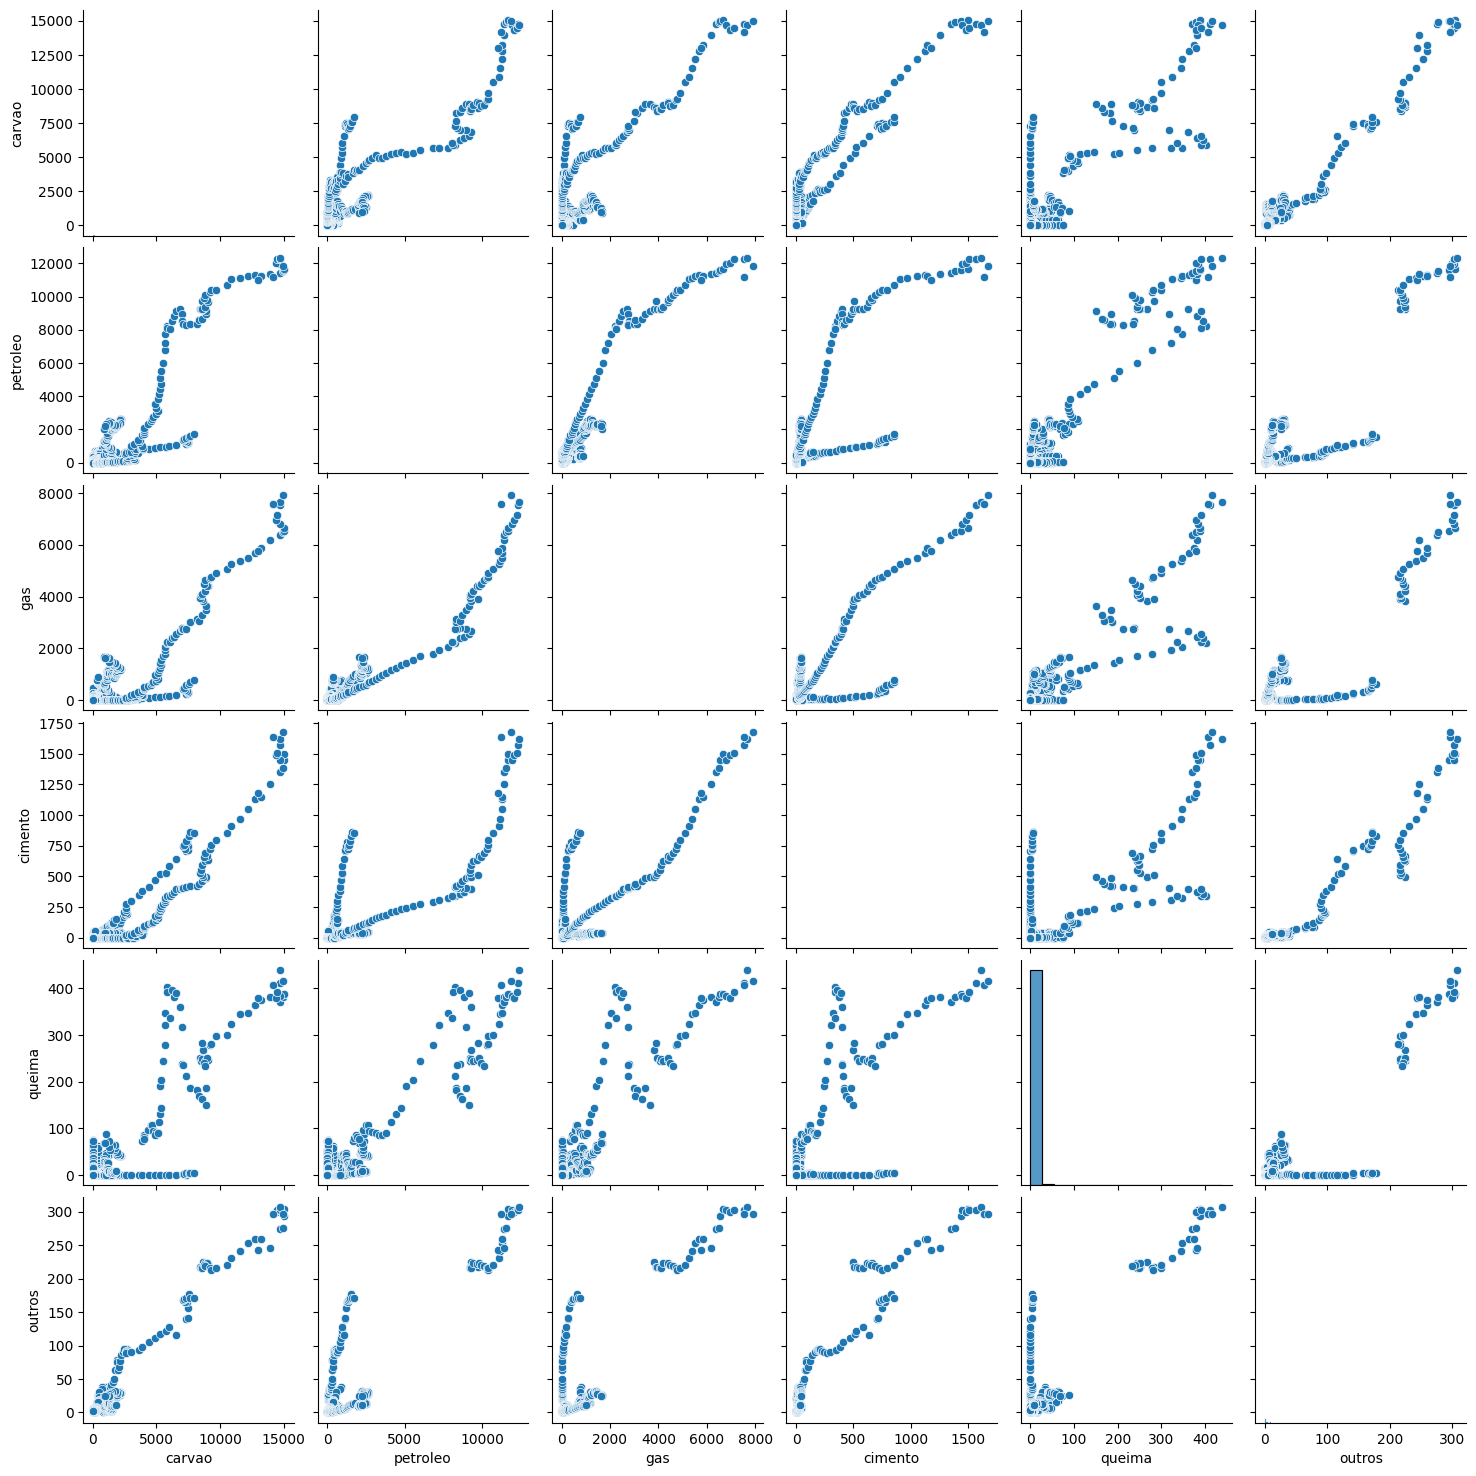

In [8]:
sns.pairplot(df[lista], height = 2.5)

É possível observar que na maioria dos casos os valores estão mais próximos do 0, e que os maiores valores de queima se deram no momento de menor valor das demais variáveis exceto o petróleo e o gás que por sua vez subirão de forma muito linear.

# 4) Pré-Processamento de dados

## 4.1) Tratamentos e Missings

Antes de iniciar o tratamento dos Missings, irei criar uma função que me retorna um DataFrame com a quantidade e porcentagem de missigs do dataset 

In [9]:
# Função que retorna um DF com a quantidade e porcentagem de na
def df_missings(dataframe):
  '''
  Retorno DF com valor total de Missings e sua porcentagem
  '''
  
  total_na = dataframe.isna().sum() # Total na por coluna
  porcent_na = ((dataframe.isna().sum() / len(dataframe))*100).round(1).astype(str)+'%' # Porcentagem na por coluna

  # Df dos missings 
  df_missing = pd.DataFrame({
      'Colunas': dataframe.columns,
      'Total na': total_na.values,
      'Porcentagem na': porcent_na.values
  })

  print("\n --- Df dos Missings por coluna ---")
  display(df_missing)

Será iniciado o tratamentode Missings exibindo:
* O numero total de linhas
* Dataframe dos Missings
* Grafico dos Missings 

O df possui 63104 linhas 

 --- Df dos Missings por coluna ---


Colunas  Total na Porcentagem na
0         pais         0           0.0%
1   sigla_pais      1632           2.6%
2          ano         0           0.0%
3        total       200           0.3%
4       carvao     41360          65.5%
5     petroleo     41387          65.6%
6          gas     41486          65.7%
7      cimento     42290          67.0%
8       queima     41554          65.9%
9       outros     61484          97.4%
10  por_pessoa     44130          69.9%


 --- Grafico de Missings por coluna ---


<Axes: >

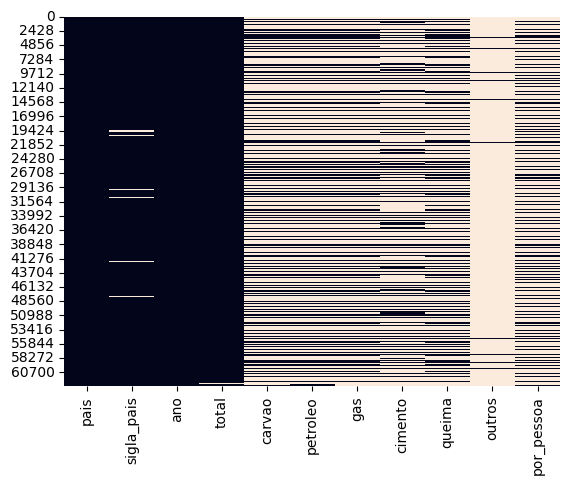

In [10]:
# O numero total de linhas
print(f"O df possui {df.shape[0]} linhas ")

# Dataframe dos Missings
df_missings(df)

# Grafico dos Missings 
print("\n --- Grafico de Missings por coluna ---")
sns.heatmap(df.isnull(), cbar=False)

As colunas que com os valores da emissão de CO2 são as que possuem a maior porcentagem de missings, chegando até a 97% do dataset no caso da coluna “outros”. Será tratado primeiramente as colunas das emissões. 

### Missings Colunas float

Já que se trata de colunas no formato float todos os missings serão transformados em 0

In [11]:
# todos os missigs destas colunas vou transformar em 0
df[['total','carvao','petroleo','gas','cimento','queima','outros','por_pessoa']] = df[['total',
'carvao','petroleo','gas','cimento','queima','outros','por_pessoa']].fillna(0)
display(df.head())

pais sigla_pais   ano  total  carvao  petroleo  gas  cimento  \
0  Afghanistan        AFG  1750    0.0     0.0       0.0  0.0      0.0   
1  Afghanistan        AFG  1751    0.0     0.0       0.0  0.0      0.0   
2  Afghanistan        AFG  1752    0.0     0.0       0.0  0.0      0.0   
3  Afghanistan        AFG  1753    0.0     0.0       0.0  0.0      0.0   
4  Afghanistan        AFG  1754    0.0     0.0       0.0  0.0      0.0   

   queima  outros  por_pessoa  
0     0.0     0.0         0.0  
1     0.0     0.0         0.0  
2     0.0     0.0         0.0  
3     0.0     0.0         0.0  
4     0.0     0.0         0.0

A coluna "total" é o resultado da soma dos valores de emissão de CO2 das demais colunas. Para verificar a precisão dos dados, será adicionada uma nova coluna denominada "total_calculado".

In [12]:
# Calculando Coluna total_calculado
df['total_calculado'] = df[['carvao','petroleo','gas','cimento','queima','outros']].sum(axis=1)
display(df[['total','total_calculado']].tail())

total  total_calculado
63099  36096.739276     36096.739276
63100  36826.506600     36826.506601
63101  37082.558969     37082.558969
63102  35264.085734     35264.085734
63103  37123.850352     37123.850352

Utilizar função do numpy para comparar as duas colunas inserindo uma tolerância de 1, exibir apenas as que excederão esta tolerância

In [13]:
# Verificando se existe algum valor que esteja calculado errado com uma tolerância de 1
df[np.logical_not(np.isclose(df['total'], df['total_calculado'], rtol=0, atol=1))][['total','total_calculado']]

total  total_calculado
62986   2279.748708      2277.914959
62987   2427.313197      2425.332746
62988   2534.734414      2532.607263
62989   2888.307767      2886.253967
62990   2776.404367      2774.570617
...             ...              ...
63067  20325.486795     20270.214490
63068  20627.358491     20567.709458
63069  21273.904184     21199.498192
63070  22107.794982     22018.632032
63071  22410.401527     22323.692327

[86 rows x 2 columns]

86 linhas não passarão no teste, após avaliar esta incoerência a coluna “total” será descartada e substituída pela coluna “total_calculada”

In [14]:
# Removendo coluna total
df.drop('total',axis=1, inplace=True)
df.head()

pais sigla_pais   ano  carvao  petroleo  gas  cimento  queima  \
0  Afghanistan        AFG  1750     0.0       0.0  0.0      0.0     0.0   
1  Afghanistan        AFG  1751     0.0       0.0  0.0      0.0     0.0   
2  Afghanistan        AFG  1752     0.0       0.0  0.0      0.0     0.0   
3  Afghanistan        AFG  1753     0.0       0.0  0.0      0.0     0.0   
4  Afghanistan        AFG  1754     0.0       0.0  0.0      0.0     0.0   

   outros  por_pessoa  total_calculado  
0     0.0         0.0              0.0  
1     0.0         0.0              0.0  
2     0.0         0.0              0.0  
3     0.0         0.0              0.0  
4     0.0         0.0              0.0

As linhas que possui 0 na coluna "total_calculada" significa que não possui nenhum valor de emissão de CO2, logo serão removidas.

In [15]:
# Remover todas as colunas que possui 0 na coluna total_calculado
df = df[df['total_calculado']>0]
df.head()

pais sigla_pais   ano    carvao  petroleo  gas  cimento  queima  \
199  Afghanistan        AFG  1949  0.014656  0.000000  0.0      0.0     0.0   
200  Afghanistan        AFG  1950  0.021068  0.063204  0.0      0.0     0.0   
201  Afghanistan        AFG  1951  0.025648  0.065952  0.0      0.0     0.0   
202  Afghanistan        AFG  1952  0.031708  0.059892  0.0      0.0     0.0   
203  Afghanistan        AFG  1953  0.037949  0.068307  0.0      0.0     0.0   

     outros  por_pessoa  total_calculado  
199     0.0    0.000000         0.014656  
200     0.0    0.011266         0.084272  
201     0.0    0.012098         0.091600  
202     0.0    0.011946         0.091600  
203     0.0    0.013685         0.106256

Analisando os missings faltantes


 --- Df dos Missings por coluna ---


Colunas  Total na Porcentagem na
0              pais         0           0.0%
1        sigla_pais        84           0.4%
2               ano         0           0.0%
3            carvao         0           0.0%
4          petroleo         0           0.0%
5               gas         0           0.0%
6           cimento         0           0.0%
7            queima         0           0.0%
8            outros         0           0.0%
9        por_pessoa         0           0.0%
10  total_calculado         0           0.0%


 --- Grafico de Missings por coluna ---


<Axes: >

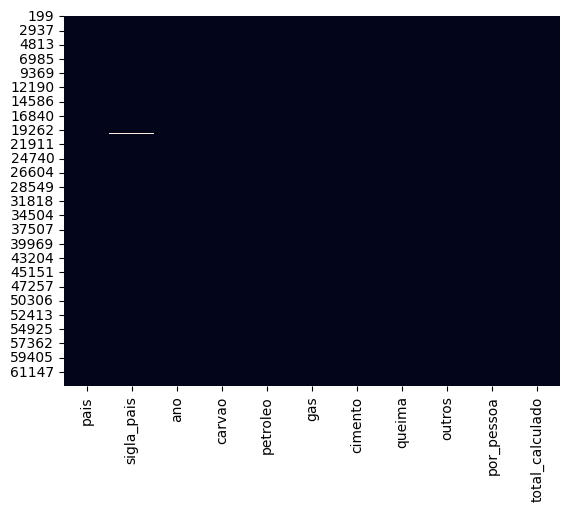

In [16]:
df_missings(df)

print("\n --- Grafico de Missings por coluna ---")
sns.heatmap(df.isnull(), cbar=False)


Possui 84 missings na coluna de "sigla_pais" que corresponde a 0,4% do dataset, estes paises serão verificados.

### Missings Colunas String

Inicialmente será verificado quais são os países que não possuem sigla

In [17]:
# Exibir lista de países que não possuem sigla
list_pais_onde_sigla_na = list(df[df['sigla_pais'].isnull()].pais.unique())
print(list_pais_onde_sigla_na)

['French Equatorial Africa', 'French West Africa', 'Kuwaiti Oil Fires', 'Leeward Islands', 'Pacific Islands (Palau)', 'Ryukyu Islands']


Verificar se nesta lista de países não possui nenhuma linha preenchida com sua respectiva sigla

In [18]:
# Nesta lista de países, nenhuma linha possui sua respectiva sigla?
df_filtred = df[df['pais'].isin(list_pais_onde_sigla_na)]
print(" --- Head dos paises que nao possui siglas ---\n")
display(df_filtred.head())

df_missings(df_filtred)

 --- Head dos paises que nao possui siglas ---



pais sigla_pais   ano    carvao  petroleo  gas  \
19512  French Equatorial Africa        NaN  1950  0.018320  0.157552  0.0   
19513  French Equatorial Africa        NaN  1951  0.007328  0.227168  0.0   
19514  French Equatorial Africa        NaN  1952  0.025648  0.278464  0.0   
19515  French Equatorial Africa        NaN  1953  0.010992  0.245488  0.0   
19516  French Equatorial Africa        NaN  1954  0.003664  0.267472  0.0   

       cimento  queima  outros  por_pessoa  total_calculado  
19512      0.0     0.0     0.0    0.033574         0.175872  
19513      0.0     0.0     0.0    0.044320         0.234496  
19514      0.0     0.0     0.0    0.056706         0.304112  
19515      0.0     0.0     0.0    0.046701         0.256480  
19516      0.0     0.0     0.0    0.048331         0.271136


 --- Df dos Missings por coluna ---


Colunas  Total na Porcentagem na
0              pais         0           0.0%
1        sigla_pais        84         100.0%
2               ano         0           0.0%
3            carvao         0           0.0%
4          petroleo         0           0.0%
5               gas         0           0.0%
6           cimento         0           0.0%
7            queima         0           0.0%
8            outros         0           0.0%
9        por_pessoa         0           0.0%
10  total_calculado         0           0.0%

Possuímos uma lista de seis países cujas siglas não estão disponíveis no formato ISO 3166-1 alpha-3. Para corrigir essa lacuna no dataset, farei uma pesquisa para encontrar as siglas correspondentes de cada um desses países e adicioná-las.

**Resultado da pesquisa:**
- Pacific Islands (Palau): PLW
- French Equatorial Africa: não é mais um país
- French West Africa: não é mais um país
- Kuwaiti Oil Fires: não é um país
- Leeward Islands: não é um país
- Ryukyu Islands: não é um país


No caso do "*Pacific Islands (Palau)*" será preenchido com a sigla encontrada "PLW", porém antes de preencher será verificado se já possui a sigla "PLW" no dataset

In [19]:
# Exibir linhas que possui a sigla 'PLW'
df[df['sigla_pais']=="PLW"].head()

pais sigla_pais   ano  carvao  petroleo  gas  cimento  queima  outros  \
42402  Palau        PLW  1992     0.0  0.197856  0.0      0.0     0.0     0.0   
42403  Palau        PLW  1993     0.0  0.197856  0.0      0.0     0.0     0.0   
42404  Palau        PLW  1994     0.0  0.197856  0.0      0.0     0.0     0.0   
42405  Palau        PLW  1995     0.0  0.197856  0.0      0.0     0.0     0.0   
42406  Palau        PLW  1996     0.0  0.197856  0.0      0.0     0.0     0.0   

       por_pessoa  total_calculado  
42402   12.362909         0.197856  
42403   12.079121         0.197856  
42404   11.798211         0.197856  
42405   11.497240         0.197856  
42406   11.158132         0.197856

De fato, a sigla "PLW" já consta no dataset, o que sugere que há dados duplicados na coluna "país" e possivelmente falta de padronização no preenchimento dessa mesma coluna.

Na proxima etapa será analisado a coluna "pais"


In [20]:
# Criando uma lista com todos os paises do dataset
print(f"Quantidade de paises: {len(df.pais.unique())}")

Quantidade de paises: 232


Na coluna "pais" possui 232 países, um numero muito grande para verificar se todos estão padronizados ou em caso de duplicidade. Para tratar este problema será utilizado a biblioteca do python chamado pycountry, que ira utilizar a coluna "sigla_pais" para preencher recriar a coluna "pais".

Após esta análise, proximos passos:
 - Organizar a coluna "sigla_pais"
 - Deletar coluna "pais"
 - Recriar coluna "pais" com o pycountry 

Retornando para a coluna "sigla_pais", será adicionado a sigla "PLW" no país "Pacific Islands (Palau)"

In [21]:
# Preencher a sigla_pais "PLW" do pais "Pacific Islands (Palau)"
df.loc[df['pais']=='Pacific Islands (Palau)','sigla_pais'] = "PLW"

Verificando quantas linhas não possuem sigla e qual a relevância dessas linhas, analisando a porcentagem de emissão de CO2

In [22]:
# Verificar quantas linhas nao possuem sigla_pais
df_sigla_na = df[df['sigla_pais'].isnull()]
print(f"Possui {df_sigla_na.shape[0]} linhas da coluna sigla_pais sem o preenchimento")

# Total de CO2
print(f"Estas linhas possui um total de {df_sigla_na['total_calculado'].sum().round(2)} Milhões de toneladas de CO2")

# Porcentagem
calculed = ((df_sigla_na['total_calculado'].sum() / df.total_calculado.sum())*100).round(3)
print(f"Isso representa {calculed}% de CO2 do dataset")


Possui 47 linhas da coluna sigla_pais sem o preenchimento
Estas linhas possui um total de 511.42 Milhões de toneladas de CO2
Isso representa 0.015% de CO2 do dataset


Já que estas linhas representam apenas 0.015% de emissão de CO2 e não estão representando países validos elas serão removidas.

In [23]:
df = df[df['sigla_pais'].isnull() ==False]
df_missings(df)


 --- Df dos Missings por coluna ---


Colunas  Total na Porcentagem na
0              pais         0           0.0%
1        sigla_pais         0           0.0%
2               ano         0           0.0%
3            carvao         0           0.0%
4          petroleo         0           0.0%
5               gas         0           0.0%
6           cimento         0           0.0%
7            queima         0           0.0%
8            outros         0           0.0%
9        por_pessoa         0           0.0%
10  total_calculado         0           0.0%

Tratamento dos Missings Concluido!

## 4.2) Tratamento coluna 'pais'

Instalando e importando a biblioteca pycountry

In [24]:
# Instalar pip do pycountry
!pip install pycountry

# Importar pycountry
import pycountry

# Testando biblioteca
country = pycountry.countries.get(alpha_3='AFG')
print(country.name)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 90.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=4aa2614da40f77b316b9d6c3cf4702fe461c7a2be433227a6fa91575a18a2232
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Afghanistan


Criando coluna "pais_encontrado" utilizando a coluna "sigla_pais e a biblioteca pycountry, e dando o valor de "desconhecido" para o caso de siglas não validas

In [25]:
# Atualizar coluna Pais
pais_list = []
for cod in list(df['sigla_pais']):
  pais = pycountry.countries.get(alpha_3=cod)
  # Verificar se todos os codigos são validos
  if pais is not None:
    pais_list.append(pais.name)
  else: 
    pais_list.append('desconhecido')

df['pais_encontrado'] = pais_list
df.head()

pais sigla_pais   ano    carvao  petroleo  gas  cimento  queima  \
199  Afghanistan        AFG  1949  0.014656  0.000000  0.0      0.0     0.0   
200  Afghanistan        AFG  1950  0.021068  0.063204  0.0      0.0     0.0   
201  Afghanistan        AFG  1951  0.025648  0.065952  0.0      0.0     0.0   
202  Afghanistan        AFG  1952  0.031708  0.059892  0.0      0.0     0.0   
203  Afghanistan        AFG  1953  0.037949  0.068307  0.0      0.0     0.0   

     outros  por_pessoa  total_calculado pais_encontrado  
199     0.0    0.000000         0.014656     Afghanistan  
200     0.0    0.011266         0.084272     Afghanistan  
201     0.0    0.012098         0.091600     Afghanistan  
202     0.0    0.011946         0.091600     Afghanistan  
203     0.0    0.013685         0.106256     Afghanistan

Verificando se existe siglas não validas

In [26]:
# Veriricar se ouve pais com codigo desconhecido 
df[df.pais_encontrado == 'desconhecido'].head()

pais sigla_pais   ano  carvao  petroleo       gas  \
18968  Panama Canal Zone        PCZ  1950     0.0  0.186864  0.007328   
18969  Panama Canal Zone        PCZ  1951     0.0  0.190528  0.007328   
18970  Panama Canal Zone        PCZ  1952     0.0  0.183200  0.007328   
18971  Panama Canal Zone        PCZ  1953     0.0  0.095517  0.007075   
18972  Panama Canal Zone        PCZ  1954     0.0  0.080608  0.003664   

       cimento  queima  outros  por_pessoa  total_calculado pais_encontrado  
18968      0.0     0.0     0.0         0.0         0.194192    desconhecido  
18969      0.0     0.0     0.0         0.0         0.197856    desconhecido  
18970      0.0     0.0     0.0         0.0         0.190528    desconhecido  
18971      0.0     0.0     0.0         0.0         0.102592    desconhecido  
18972      0.0     0.0     0.0         0.0         0.084272    desconhecido

Encontrado 388 países com siglas não validas, exibindo estes países 

In [27]:
df[df.pais_encontrado == 'desconhecido'].pais.unique()

array(['Panama Canal Zone', 'Kosovo', 'International Transport', 'Global'],
      dtype=object)

Possui 4 Países com a sigla invalida, será feita uma pesquisa para cada um dos casos

**Resultado:**

* **Panama Canal Zone**: Não é mais uma entidade política independente e não possui um código oficial na norma ISO 3166-1.
* **Kosovo**: estado com reconhecimento limitado e atualmente não possui um código ISO 3166-1 alpha-3 oficial
* **International Transport**: Não é um pais
* **Global**: Não é um pais (O valor Global sera calculado com base ao dataframe após a limpeza)

In [28]:
# Filtrar apenas um df com os países desconhecidos removendo o que for "global"
df_filtred = df[(df.pais_encontrado == 'desconhecido') & (df.pais != "Global")].total_calculado.sum()

# Total de CO2
print(f"Removendo o Global, possui um total de {df_filtred.round(2)} Milhões de toneladas de CO2 nestes casos")

# Porcentagem
calculed = ((df_filtred / df.total_calculado.sum())*100).round(3)
print(f"Isso representa {calculed}% de CO2 do dataset")

Removendo o Global, possui um total de 43188.74 Milhões de toneladas de CO2 nestes casos
Isso representa 1.244% de CO2 do dataset


Considerando que o objetivo dessa análise é estudar as emissões de CO2 por país, todas as colunas que não representam um país serão removidas do dataset.

In [29]:
# Removendo as linhas das siglas nao validas
df = df[df['pais_encontrado'] != "desconhecido"]
df.head()

pais sigla_pais   ano    carvao  petroleo  gas  cimento  queima  \
199  Afghanistan        AFG  1949  0.014656  0.000000  0.0      0.0     0.0   
200  Afghanistan        AFG  1950  0.021068  0.063204  0.0      0.0     0.0   
201  Afghanistan        AFG  1951  0.025648  0.065952  0.0      0.0     0.0   
202  Afghanistan        AFG  1952  0.031708  0.059892  0.0      0.0     0.0   
203  Afghanistan        AFG  1953  0.037949  0.068307  0.0      0.0     0.0   

     outros  por_pessoa  total_calculado pais_encontrado  
199     0.0    0.000000         0.014656     Afghanistan  
200     0.0    0.011266         0.084272     Afghanistan  
201     0.0    0.012098         0.091600     Afghanistan  
202     0.0    0.011946         0.091600     Afghanistan  
203     0.0    0.013685         0.106256     Afghanistan

Removendo a coluna 'pais' e renomeando a coluna 'pais_encontrado' por 'pais'.

In [30]:
# Remover coluna 'pais' 
df = df.drop('pais',axis=1)
# Transformar coluna 'pais_encontrado' em 'pais' 
df = df.rename(columns={'pais_encontrado':'pais'})

df.head()

sigla_pais   ano    carvao  petroleo  gas  cimento  queima  outros  \
199        AFG  1949  0.014656  0.000000  0.0      0.0     0.0     0.0   
200        AFG  1950  0.021068  0.063204  0.0      0.0     0.0     0.0   
201        AFG  1951  0.025648  0.065952  0.0      0.0     0.0     0.0   
202        AFG  1952  0.031708  0.059892  0.0      0.0     0.0     0.0   
203        AFG  1953  0.037949  0.068307  0.0      0.0     0.0     0.0   

     por_pessoa  total_calculado         pais  
199    0.000000         0.014656  Afghanistan  
200    0.011266         0.084272  Afghanistan  
201    0.012098         0.091600  Afghanistan  
202    0.011946         0.091600  Afghanistan  
203    0.013685         0.106256  Afghanistan

## 4.3) Tratamento de Outliers





A seguir será exibido um boxesplot para analisar os Outliers

<Axes: >

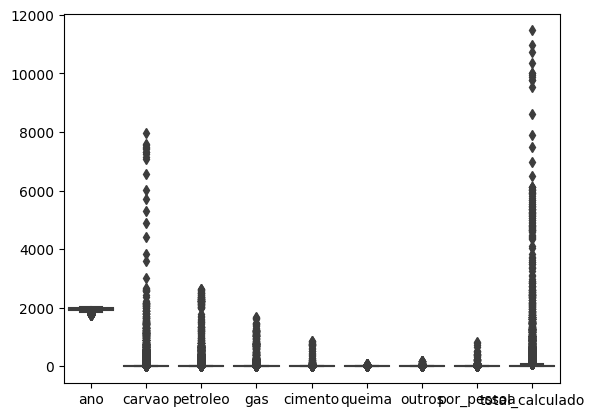

In [31]:
sns.boxplot(data=df)

Para obter uma visualização mais clara da distribuição dos dados, será usado a função sns.catplot() em vez de sns.boxplot(). Porem para a escala não afetar negativamente a visualização as colunas serão plotadas em grupos. Se for identificado anomalias(Outliers), será comentadas abaixo do gráfico e tratado em seguida.

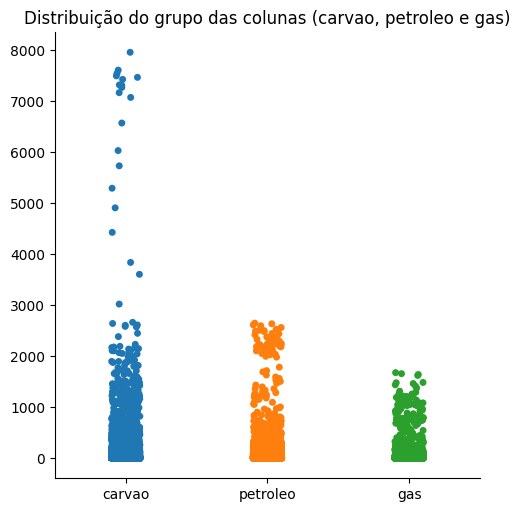

In [32]:
# Separando em grupos para uma melhor visualização
sns.catplot(df[['carvao','petroleo','gas']]).set(title="Distribuição do grupo das colunas (carvao, petroleo e gas)")

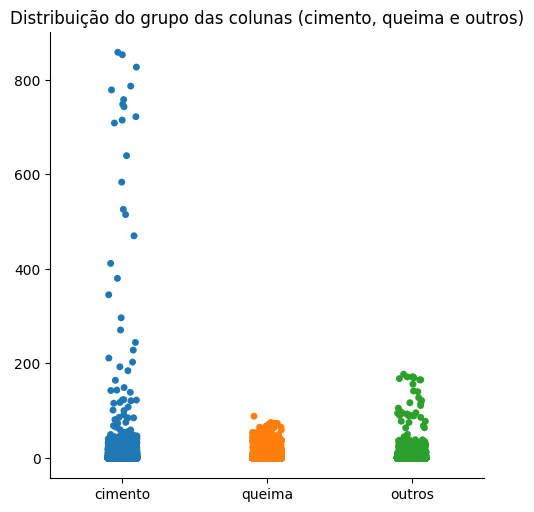

In [33]:
sns.catplot(df[['cimento','queima','outros']]).set(title="Distribuição do grupo das colunas (cimento, queima e outros)")

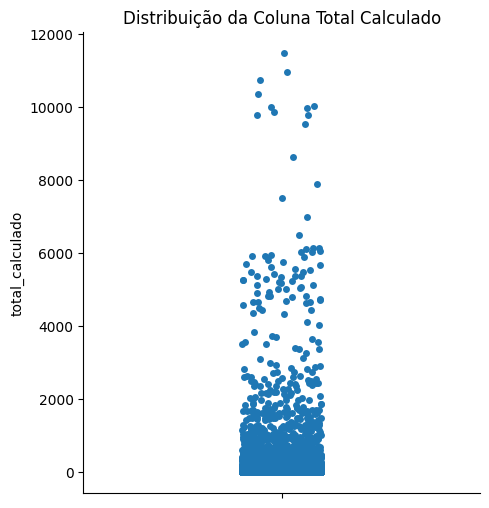

In [34]:
sns.catplot(df.total_calculado).set(title="Distribuição da Coluna Total Calculado")

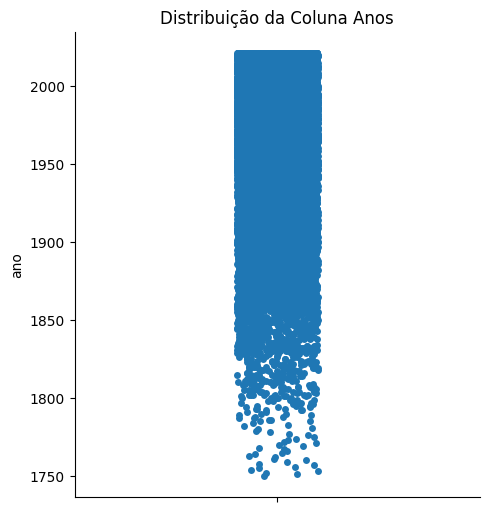

In [35]:
sns.catplot(df.ano).set(title='Distribuição da Coluna Anos')

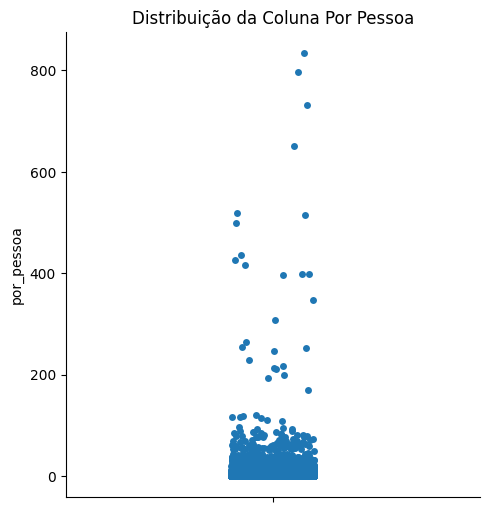

In [36]:
sns.catplot(df.por_pessoa).set(title='Distribuição da Coluna Por Pessoa')

Talvez exista Outliers na coluna "por_pessoa", será analisado

Será exibido esta distriubuição colocando a coluna "ano" no eixo X

[Text(0.5, 1.0, 'Distribuição da Coluna Por Pessoa')]

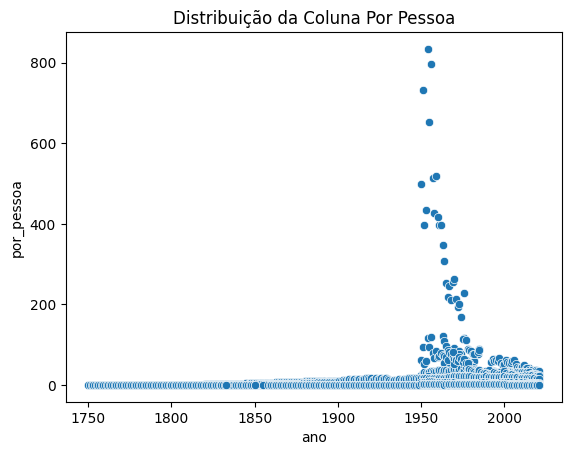

In [37]:
sns.scatterplot(x='ano',y='por_pessoa',data=df).set(title='Distribuição da Coluna Por Pessoa')

Será comparado com o gráfico de distribuição do "total_calculado" por "ano", para verificar se ouve muita emissão no mesmo período

[Text(0.5, 1.0, 'Distribuição da Coluna total_calculado')]

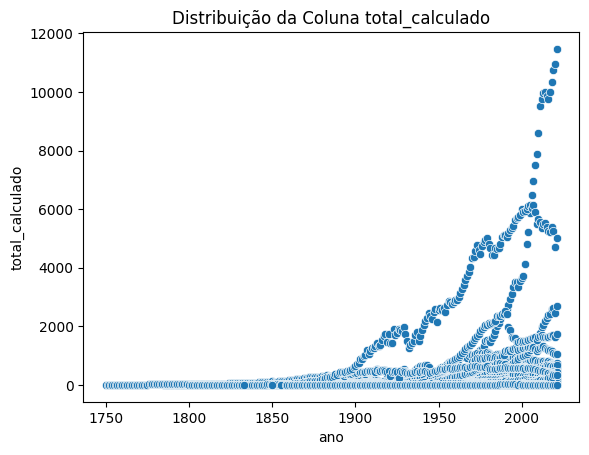

In [38]:
sns.scatterplot(x='ano',y='total_calculado',data=df).set(title='Distribuição da Coluna total_calculado')

Não foi identificado o motivo, será exibido as linhas do dataset que possui o valor maior que 500 na coluna "por_pessoa" para tentar entender 

In [39]:
df[df['por_pessoa']>500]

sigla_pais   ano  carvao  petroleo  gas  cimento  queima  outros  \
48616        SXM  1950     0.0  0.729008  0.0      0.0     0.0     0.0   
48617        SXM  1951     0.0  1.149743  0.0      0.0     0.0     0.0   
48620        SXM  1954     0.0  1.554101  0.0      0.0     0.0     0.0   
48621        SXM  1955     0.0  1.285500  0.0      0.0     0.0     0.0   
48622        SXM  1956     0.0  1.662560  0.0      0.0     0.0     0.0   
48623        SXM  1957     0.0  1.135549  0.0      0.0     0.0     0.0   
48625        SXM  1959     0.0  1.280404  0.0      0.0     0.0     0.0   

       por_pessoa  total_calculado                       pais  
48616  500.005475         0.729008  Sint Maarten (Dutch part)  
48617  731.854547         1.149743  Sint Maarten (Dutch part)  
48620  834.192642         1.554101  Sint Maarten (Dutch part)  
48621  651.545792         1.285500  Sint Maarten (Dutch part)  
48622  796.626925         1.662560  Sint Maarten (Dutch part)  
48623  514.521581         1.135549  Sint Maarten (Dutch part)  
48625  518.382362         1.280404  Sint Maarten (Dutch part)

O pais com maior emissão de CO2 por pessoa é "Sint Maarten (Dutch part)" Trata-se de um pequeno país constituinte localizado no Mar do Caribe com aproximadamente 43.000 pessoas, Já que neste país possui um numero de habitantes reduzido seu valor de emissão por pessoa pode acabar distoando dos demais, logo este dado não se trata como um erro no dataset, seu valor é plausível e não sera descartado.

Após avaliar os possíveis outliers, chegou-se à conclusão que nenhum dado será alterado para não perder a integridade do dataset


# 5) Análise Exploratória

Na etapa de análise exploratória será feito um estudo dos dados em busca de extrair o máximo de informação dos dados

## 5.1) Emissão total Por ano

Será instalado e importado a biblioteca plotly para plotar gráficos com funções dinâmicas, possibilitando o uso do zoom para melhor análise dos dados

In [40]:
# Instalar e importar a biblioteca para plotar graficos mais dinâmicos
!pip install plotly
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Será plotado o gráfico de emissão total de CO2 por ano para analisar seu comportamento

In [41]:
from plotly.graph_objs import YAxis
# A emissão Global de CO2 esta aumentando?

# Ordenar df por data
df = df.sort_values(by=['ano'])
# Agrupando o Total de emissão de carbono por ano
df_filtred = df.groupby('ano')['total_calculado'].sum(numeric_only=True).reset_index()
# Dados
fig = px.line(df_filtred, x='ano',  y='total_calculado')
# Detalhes
fig.update_layout(title="Emissão Total de CO2 por Ano", xaxis_title="Ano", yaxis_title="Emissão Total (Mt)", height=300)
# Exibir
fig.show()


A partir do Ano de 1900, houve um aumento considerável das emissões de carbono mundiais.

## 5.2) Emissão total para cada tipo de combustível

Será feito um gráfico dos tipos de emissão ao longo do ano 

In [42]:
# Agrupar por Ano, mantendo a soma das colunas das diferentes emissões

df_filtred = df.groupby('ano')[['carvao','petroleo','gas','cimento','queima']].sum().reset_index()

fig = px.line(df_filtred, x='ano', y=['carvao','petroleo','gas','cimento','queima'])
fig.update_layout(title="Tipos de Emissões ao longo dos Ano", xaxis_title="Ano", yaxis_title="Emissões (Mt)", height=300, legend=dict(xanchor="left"))
fig.show()


Possível avaliar:

- Miníma Evolução da queima e do cimento 
- Forte e repentino o crescimento do gás e do petróleo a partir de 1950
- Crescimento constante do carvão desde 1850

Agora será ranqueado os tipos de emissão 

In [43]:
# Criar df com o total de cada emissão
df_filtred = pd.DataFrame({'carvao': [df['carvao'].sum()], 
                          'petroleo': [df['petroleo'].sum()], 
                          'gas': [df['gas'].sum()], 
                          'cimento': [df['cimento'].sum()], 
                          'queima': [df['queima'].sum()]})
# Grafico
fig = px.bar(df_filtred)
# Layout
fig.update_layout(
    title='Emissões Total de CO2 por tipo de combustível',
    xaxis_title='Tipo de combustível',
    yaxis_title='Emissões de CO2 (Mt)',
    barmode='group', 
    legend=dict(xanchor="left")
)

fig.show()

Carvão esta muito a frente na Emissão total de CO2

## 5.3) Emissão total para cada pais

Na primeira exibição, será apresentado um mapa-múndi em forma de mapa de calor, destacando os países que mais emitem CO2. Além disso, o mapa será animado para mostrar como essas emissões se comportaram ao longo dos anos

In [53]:
# Definir coluna com total_acumulado com dados acumulativos
df_filtred = df.sort_values(['ano', 'sigla_pais'])
# calcular a soma acumulada para cada pais
df_filtred['total_acumulado'] = df_filtred.groupby('sigla_pais')['total_calculado'].cumsum()

# Criar grafico do Mundo 
fig = px.choropleth(df_filtred, 
                    locations='sigla_pais', 
                    color='total_acumulado',
                    color_continuous_scale=['gray','yellow','orange','red'], 
                    hover_name='pais',
                    animation_frame='ano',
                    projection='natural earth'
                    )

# Personalização do layout do gráfico
fig.update_layout(title='Emissão total de CO2 por país por ano',
                  # Definir propriedades do mapa
                  geo={
                      'showcountries':True, #Exibir linhas
                      'showcoastlines':True, #Exibir Linha das Costas
                      'coastlinecolor':'gray', #Definir sua cor
                      'showland':True,  #Exibir Terras
                      'landcolor':'lightgray', #Definir sua cor
                      'showocean':True, #Exibir Oceano
                      'oceancolor':'azure', #Definir sua cor
                  },
                  # Definir Legenda Para o Mapa de calor  
                                   
                  coloraxis={'colorbar':
                              {'title':'Total de CO2 (Mt)'}
                             },
                  # Altura do grafico
                  height=600)

# Agilizar animação
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50

# Exibição do gráfico
fig.show()

Nesta Animação foi possível analisar que o pais que mais emitiu CO2 se iniciou em "United Kingdom" passou para os "United States" finalizando com "United States" com maior emissão, "chine" em segundo lugar e depois "Russian"

A seguir será exibido um grafico de linha da emissão de cada país ao longo dos anos 

In [54]:
# Plotar grafico de linha exibindo a emissão total para cada pais por ano
fig = px.line(df, x='ano', y='total_calculado', color='pais')
fig.update_layout(title='Emissão total dos paises por ano',
                  yaxis_title="Emissão CO2 (Mt)",
                  legend=dict(xanchor="left"))

Para uma visualização mais clara, exibiremos o mesmo gráfico, mas destacando apenas os cinco países que mais emitem CO2. Em seguida, mostraremos um gráfico com o ranking completo desses países.

In [55]:
# N° De países a serem mostrados
x=5

# calcular a soma total das emissões de cada país
df_filtred = df.groupby('pais').sum(numeric_only=True)
# ordenar de forma decrescente pela soma das emissões
df_sorted = df_filtred.sort_values('total_calculado', ascending=False)
# selecionar lista com os 10 primeiros países
top_x = df_sorted.index[:x]
# filtrar o dataframe original para incluir apenas as linhas correspondentes aos x países principais
df_top_x = df[df['pais'].isin(top_x)]

# Criar e Mostrar o grafico
fig = px.line(df_top_x, x='ano', y='total_calculado', color='pais')
fig.update_layout(title='Emissão total dos paises por ano',
                  yaxis_title="Emissão CO2 (Mt)")
fig.show()


# Criar e Mostrar o grafico
fig2 = px.bar(df_sorted.head(x), y='total_calculado')
fig2.update_layout(title='Emissão total dos top {} países'.format(x),
                  xaxis_title='País',
                  yaxis_title='Emissão CO2 (Mt)', 
                  legend=dict(xanchor="left")
                  )

fig2.show()

É possível observar que os Estados Unidos mantiveram altos índices de emissão de CO2 por um longo período de tempo em comparação com outros países, enquanto a China experimentou um forte crescimento repentino em suas emissões em 1962.

## 5.4) Emissão total por pais e tipo de combustível

Para os cinco países com as maiores emissões de CO2, exibiremos dois gráficos. O primeiro será um gráfico de linha comparando os diferentes tipos de emissões de cada país ao longo dos anos. O segundo será um gráfico de classificação, apresentando a posição para cada tipo de emissão.

In [47]:
for pais in top_x:
  # Filtrar top x Paises
  df_pais = df[df['pais'] == pais];print('''
  '''+pais)

  # Criar Df Para Grafico de linha
  df_filtred = df_pais.groupby('ano')[['carvao','petroleo','gas','cimento','queima']].sum(numeric_only=True).reset_index()
  # Criar Grafico de linha
  fig = px.line(df_filtred, x='ano', y=['carvao','petroleo','gas','cimento','queima'])
  fig.update_layout(title="Tipos de Emissões ao longo dos Ano - {}".format(pais),
                    xaxis_title="Ano", yaxis_title="Emissões (Mt)", height=300)
  fig.show()


  # Criar Df Para Grafico de Barra
  df_filtred = pd.DataFrame({'carvao': [df_pais['carvao'].sum()], 
                            'petroleo': [df_pais['petroleo'].sum()], 
                            'gas': [df_pais['gas'].sum()], 
                            'cimento': [df_pais['cimento'].sum()], 
                            'queima': [df_pais['queima'].sum()]})
  # Criar Grafico de Barra
  fig2 = px.bar(df_filtred)
  fig2.update_layout(
      title='Emissões Total de CO2 por tipo de combustível',
      xaxis_title='Tipo de combustível',yaxis_title='Emissões de CO2 (Mt)',
      barmode='group', height=300
  )
  fig2.show()


  United States



  China



  Russian Federation



  Germany



  United Kingdom


Todos os Países ao longo dos Analisados tem o maior consumo de Carvão, porem a partir de 1950 cada pais tem sua alteração de maior consumo 

Possível avaliar tendencia para os próximos anos:
- **United Kingdom:** após 1972 Teve uma diminuição da emissão de CO2, e é possível ver uma tendência de queda para os próximos anos 
- **Germany:** após 1963 Também apresentou uma diminuição da emissão de CO2, e possivel ver uma tendência de estabilidade para os próximos anos 
- **Russian Federation:** Após 1990 Também é possível ver uma diminuição de CO2 para todos os tipos de combustível com tendência de estabilidade, exceto para o gás que além de não ter diminuído como os demais combustíveis, ele continuou aumentando e possui uma tendência de aumento para os próximos anos.
- **China:** Tem uma tendência de subida desde sempre, porem após 1970 sua emissão de CO2 por meio do combustível carvão teve um grande aumento com tendência de aumentar ainda mais.
- **United States:** Apresenta bastante oscilações em suas emissões, tendo um aumento da emissão de CO2 a partir de 1950 predominantemente em Petróleo, carvão e gás 


## 5.5) Emissão total para cada tipo de combustível

Apresentaremos cinco gráficos do mundo, cada um representando um tipo de emissão em um formato de mapa de calor. Esses gráficos serão animados para mostrar como o comportamento dessas emissões evoluiu ao longo dos anos.

No final dos 5 Graficos tambem será exibido o grafico de emissão total de CO2 per capita.

In [48]:
# Sera que existe uma tendência da emissão de um determinado combustível com base em sua localização no mundo?
# Criar gráfico do Mundo 
for combustival in ['carvao','petroleo','gas','cimento','queima', 'por_pessoa']:
  print('''
  Emissão de CO2 Originado do(a) {} pelos países ao longo dos ano'''.format(combustival))

  if combustival == 'por_pessoa':
    print("\n Aproveitar a estrutura do codigo sera tambem analisar a emissão total de CO2 per capita")

  # Definir coluna com total_acumulado com dados acumulativos
  df_filtred = df.sort_values(['ano', 'sigla_pais'])
  # calcular a soma acumulada para cada pais
  df_filtred[combustival+"_acumulado"] = df_filtred.groupby('sigla_pais')[combustival].cumsum()

  fig = px.choropleth(df_filtred, 
                      locations='sigla_pais', 
                      color=combustival+"_acumulado",
                      color_continuous_scale=['gray','yellow','orange','red'], 
                      hover_name='pais',
                      animation_frame='ano',
                      projection='natural earth'
                      )

  # Personalização do layout do gráfico
  fig.update_layout(title='Emissão de CO2 Originado do {} pro país ao longo dos ano'.format(combustival),
                    # Definir propriedades do mapa
                    geo={
                        'showcountries':True, #Exibir linhas
                        'showcoastlines':True, #Exibir Linha das Costas
                        'coastlinecolor':'gray', #Definir sua cor
                        'showland':True,  #Exibir Terras
                        'landcolor':'lightgray', #Definir sua cor
                        'showocean':True, #Exibir Oceano
                        'oceancolor':'azure', #Definir sua cor
                    },
                    # Definir Legenda Para o Mapa de calor  
                                    
                    coloraxis={'colorbar':
                                {'title':'Total de CO2 (Mt)'}
                              },
                    # Altura do grafico
                    height=500)

  # Agilizar animação
  fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50
  # Nao permitir zoom para nao atrabalhar barra de rolagem
  fig.update_layout(xaxis=dict(fixedrange=True),yaxis=dict(fixedrange=True),dragmode=False)


  # Exibição do gráfico
  fig.show()


  Emissão de CO2 Originado do(a) carvao pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) petroleo pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) gas pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) cimento pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) queima pelos países ao longo dos ano



  Emissão de CO2 Originado do(a) por_pessoa pelos países ao longo dos ano

 Aproveitar a estrutura do codigo sera tambem analisar a emissão total de CO2 per capita


Não é possível Ver uma predominância do tipo de emissão com base em sua geolocalização, porem é possível ver que o petróleo e o gás se tornou presente a partir de 1860 e que "China" "Rússia" e "Estados Unidos" sempre manterão as posições de maiores emissões de CO2 em exceto na emissão por queima onde a China não entra para os top 3 dando espaço para o "Irã"


Já no gráfico de **emissão per capita**, o "United Kingdom" manteve-se na primeira posição por um período, cedendo o lugar para os "United States" posteriormente. No entanto, a posição final não foi claramente visível no gráfico, pois pertencia a "Sint Maarten (Dutch part)", que poderia ser interpretado como outlier, embora tenha decidido não remove-lo no tratamento dos dados, observando nessas condições, concluo que seria melhor removê-lo para uma análise mais precisa deste gráfico.

## 5.6) Emissão total Per capita

Nesta etapa será removido o país "Sint Maarten (Dutch part)" , para uma melhor visualização do gráfico de calor do mundo de emissão per capita de CO2

In [49]:
df_filtred = df[df.sigla_pais != "SXM"]

# Definir coluna com total_acumulado com dados acumulativos
df_filtred = df_filtred.sort_values(['ano', 'sigla_pais'])
# calcular a soma acumulada para cada pais
df_filtred['por_pessoa'] = df_filtred.groupby('sigla_pais')[combustival].cumsum()

fig = px.choropleth(df_filtred, 
                    locations='sigla_pais', 
                    color='por_pessoa',
                    color_continuous_scale=['gray','yellow','orange','red'], 
                    hover_name='pais',
                    animation_frame='ano',
                    projection='natural earth'
                    )

# Personalização do layout do gráfico
fig.update_layout(title='Emissão de CO2 Originado do {} pro país ao longo dos ano'.format(combustival),
                  # Definir propriedades do mapa
                  geo={
                      'showcountries':True, #Exibir linhas
                      'showcoastlines':True, #Exibir Linha das Costas
                      'coastlinecolor':'gray', #Definir sua cor
                      'showland':True,  #Exibir Terras
                      'landcolor':'lightgray', #Definir sua cor
                      'showocean':True, #Exibir Oceano
                      'oceancolor':'azure', #Definir sua cor
                  },
                  # Definir Legenda Para o Mapa de calor  
                                  
                  coloraxis={'colorbar':
                              {'title':'Total de CO2 (Mt)'}
                            },
                  # Altura do grafico
                  height=500)

# Agilizar animação
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50

# Exibição do gráfico
fig.show()


Houve uma pequena alteração na exibição onde finalizou com o "Qatar" na posição final, porém irei plotar um gráfico ranqueando os 15 primeiros países de emissão per capita de CO2

In [50]:
# Calcular por_pessoa Acumulativo
df_filtred = df.groupby('pais').sum(numeric_only=True)

# Ordenar do maior para o menos 
df_filtred = df_filtred.sort_values('por_pessoa',ascending=False)[:15]

# Gerar grafico
fig = px.bar(df_filtred, y='por_pessoa')
fig.update_layout(
    title='Emissões per capita de CO2',
    yaxis_title='Emissões Per Capita de CO2 (t)',
    barmode='group'
)
fig.show()

"Sint Maarter" se mantem fortemente em primeira posição neste gráfico seguido de "curação", "Qatar" e "United States". Além dos Estados unidos serem o primeiro na emissão global de CO2 ele é o quarto com maior emissão per capita de CO2  

## 5.7) Verificações finais

Agora com os dados limpos farei um outro grafico de correlação

<Axes: >

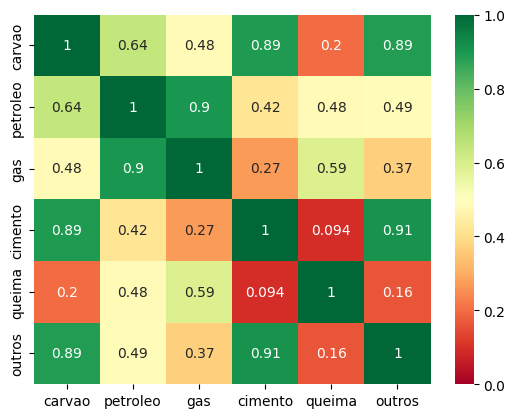

In [51]:
lista = ['carvao','petroleo','gas','cimento','queima','outros'] 
sns.heatmap(df[lista].corr(), annot=True, cmap="RdYlGn", vmin=0, vmax=1)

Não há nenhuma correlação negativa.

* **Carvão**, **Cimento** e **Outros** possuem uma forte correlação positiva de **0.89**
* **Petróleo** e **Gás** possuem uma forte correlação positiva de **0.9**
* **Queima** Não possui nenhuma correlação

# 6) Conclusão e insights para etapa de Machine learning

No tópico 5.3 e 5.4, é possível observar que a partir de 2000 cada país adotou um caminho distinto em relação ao consumo de cada tipo de combustível. Alguns países conseguiram reduzir suas emissões totais de CO2, enquanto outros aumentaram. Além disso, foi possível notar que alguns países conseguiram reduzir as emissões de determinados tipos de combustíveis, enquanto aumentaram as emissões de outros tipos.

Para facilitar a visualização desta informação será plotado um gráfico de correlação dos Estados unidos a partir de 2000

<Axes: >

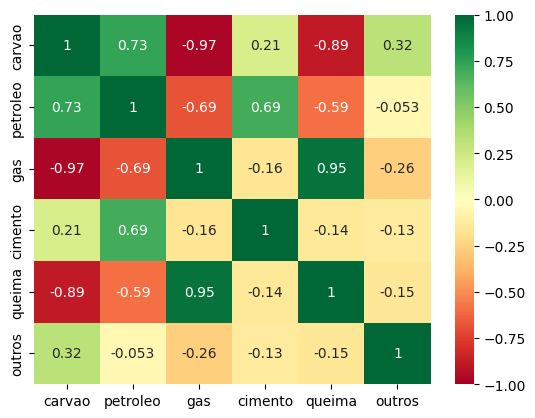

In [52]:
df_filtred = df[(df.ano>2000) & (df.pais == "United States")] 
sns.heatmap(df_filtred[lista].corr(), annot=True, cmap="RdYlGn", vmin=-1, vmax=1)

Com o gráfico acima é possível notar uma auto correlação negativa do consumo de energia pela fonte de carvão e gás e uma positiva entre a queima e o gás.

Com base nestas avaliações, é possível criar um modelo de regressão supervisionado. Para isso, você poderia reduzir o seu dataset removendo os dados anteriores a 2000 e escolher uma variável de saída, como por exemplo "Petróleo". Em seguida, você pode definir todas as outras emissões e a coluna ano como variáveis de entrada. Dessa forma, você pode treinar seu modelo para prever as emissões futuras de um determinado tipo de combustível e entender a relação entre os diferentes tipos de combustíveis.

Além disso, é importante mencionar que você pode alterar a variável de saída do modelo para prever as emissões de outros tipos de combustíveis, o que pode ajudá-lo a entender melhor as relações entre essas diferentes emissões. Para avaliar o desempenho do seu modelo, você pode utilizar técnicas de validação cruzada e métricas de avaliação de regressão.